# Setting up the data

In [ ]:
#If you wish to use the data from the google drive use this code
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Install the `gdown` package from PyPI
# gdown is a Python tool that allows you to easily download files from Google Drive
# The exclamation mark (!) is used in Jupyter notebooks to run shell commands
!pip install gdown

In [ ]:
# Download a file from Google Drive using gdown
# The string after `!gdown` is the unique file ID from the Google Drive share link
# Syntax: !gdown <file_id>
# Example link format: https://drive.google.com/file/d/<file_id>/view?usp=sharing
!gdown 1co9mz1hJyK19JEenwbcDdG1zMzSEjRnJ
!wget -c https://www.ncc.unesp.br/datatrieste2025/Data-20250811T082927Z-1-001.zip
!gdown 1PF5qJkkerCZACWHaGHTY5N35cW6l_Tjs
!wget -c https://www.ncc.unesp.br/datatrieste2025/Data-20250811T082927Z-1-002.zip

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1co9mz1hJyK19JEenwbcDdG1zMzSEjRnJ

but Gdown can't. Please check connections and permissions.
--2025-08-11 17:18:38--  https://www.ncc.unesp.br/datatrieste2025/Data-20250811T082927Z-1-001.zip
Resolving www.ncc.unesp.br (www.ncc.unesp.br)... 200.145.46.8, 2801:88:3cc:46:5054:ff:fe5b:56a4
Connecting to www.ncc.unesp.br (www.ncc.unesp.br)|200.145.46.8|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Failed to retrieve fi

In [ ]:
# Create a directory (folder) for storing data
# `mkdir` = make directory
# `-p` = create parent directories as needed (no error if they already exist)
# The quoted path specifies where the directory will be created
# In this case, it will create:
#   Urban Data Science/
#       Day 1/
#           Data/!mkdir -p "Urban Data Science/Day 1/Data/"
!unzip Data-20250811T082927Z-1-001.zip -d "Urban Data Science/Day 1/"

Archive:  Data-20250811T082927Z-1-001.zip
checkdir:  cannot create extraction directory: Urban Data Science/Day 1
           No such file or directory


In [ ]:
# Unzip a compressed .zip file into a specific directory
# `unzip` = command to extract ZIP archive contents
# `Data-20250811T082927Z-1-002.zip` = the ZIP file to extract
# `-d` = specify destination directory for extracted files
# Files will be placed inside: Urban Data Science/Day 1/
!unzip Data-20250811T082927Z-1-002.zip -d "Urban Data Science/Day 1/"

Archive:  Data-20250811T082927Z-1-002.zip
checkdir:  cannot create extraction directory: Urban Data Science/Day 1
           No such file or directory


## 1. Introduction to Spatial Urban Data
Welcome to the Spatial Urban Data module of the Spatial Data Science course! In this course, you will explore how spatial data plays a critical role in understanding, planning, and managing urban environments. Spatial urban data refers to any data that captures characteristics of cities and urban areas, with a specific emphasis on their geographic location.

Urban planning and decision-making rely heavily on spatial data to understand how different elements of the built and natural environment interact. These interactions help us analyze patterns such as population distribution, traffic flows, land use, accessibility, and environmental impacts.

In this module, we will introduce the primary types of spatial data used in urban studies:

1. Vector data – This includes discrete features such as buildings, roads, parcels, and administrative boundaries, typically represented as points, lines, or polygons.

2. Raster data – This represents continuous data such as satellite imagery, land surface temperature, or solar potential maps, stored in a grid format.

By the end of this module, you will understand the fundamentals of spatial urban data, how it is structured, and how it can be applied to real-world urban challenges.

First lets import all the necessay libraries

In [ ]:
# ============================================
# LIBRARY IMPORTS FOR URBAN DATA SCIENCE
# ============================================

# Basic Data Handling and Analysis
import pandas as pd       # For handling tabular data (CSV, Excel, DataFrames)
import numpy as np        # For numerical operations and array manipulation

# Geospatial Data Processing
import geopandas as gpd   # Extends pandas with support for geospatial data (shapefiles, GeoJSON)
from shapely.geometry import Point, Polygon  # For handling geometric objects like points, lines, polygons

# Mapping & Visualization
import matplotlib.pyplot as plt     # For standard plotting (line plots, bar charts, etc.)
import seaborn as sns               # For advanced statistical plots (heatmaps, correlation)
import folium                       # For interactive web-based maps (Leaflet.js)

# Raster Data (for remote sensing and surface analysis)
!pip install rasterio
import rasterio # For reading and manipulating raster (satellite) data
from rasterio.plot import show     # Quick display of raster data

# Date-Time Handling
import datetime                    # Useful for working with time-based trends (e.g., population over years)

# File Operations and System
import os                          # For working with file paths and directories



# Confirmation Message
print("All essential libraries have been imported successfully")

All essential libraries have been imported successfully


## What Is a Vector Data Model?
The vector data model represents geographic features using:

1. Points (e.g., bus stops, trees, lamp posts)

2. Lines (e.g., roads, rivers, power lines)

3. Polygons (e.g., building footprints, land parcels, city boundaries)

Each of these geometries can store attributes in a structured format like a table.

### Vector Data Types Overview

Vector data represents real-world features using **geometries** such as points, lines, and polygons. Each type serves a different analytical purpose in urban and geospatial studies.

| **Geometry Type** | **Example**                       | **Use Case**                               |
|-------------------|-----------------------------------|--------------------------------------------|
| **Point**       | Location of a school              | Mapping Points of Interest (POIs)          |
| **Line**        | Road or railway segment           | Transportation planning & routing analysis |
| **Polygon**     | A city block or park boundary     | Land use, zoning, administrative areas     |




```
`# This is formatted as code`
```

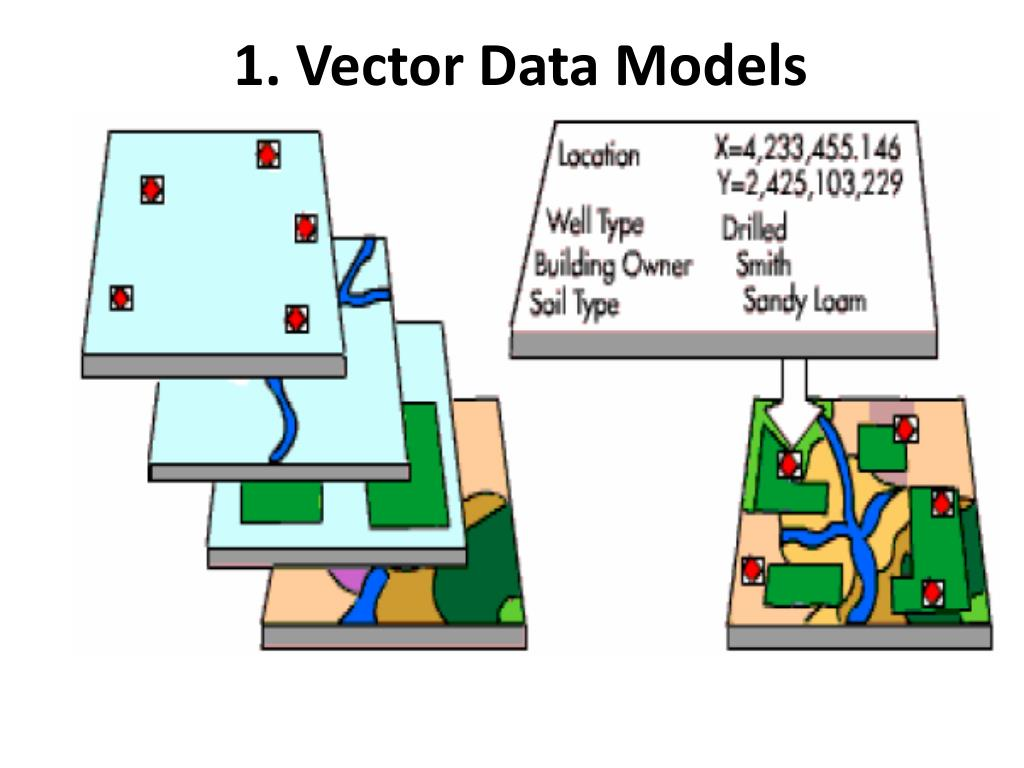

Image source: Esri. (2015). Vector data. ArcGIS Pro Documentation.

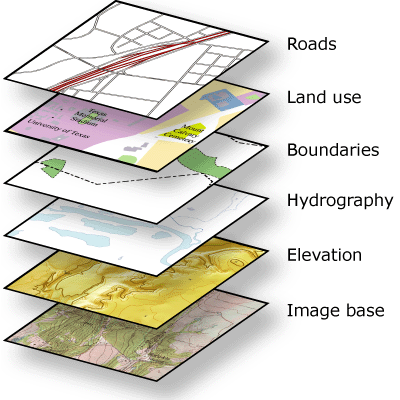

Image source: Esri. (2017). Get started with ArcGIS Online.





In [ ]:
import os
#Test the existence of the file in a code cell:
os.path.exists(r'Urban Data Science/Day 1/Data/Admin_boundary/Austria_Admin_Boundary.shp')


True

In [ ]:
# Now Lets load the data
admin_boundaries = gpd.read_file('Urban Data Science/Day 1/Data/Admin_boundary/Austria_Admin_Boundary.shp')

In [ ]:
# Print a title to indicate what kind of information is being displayed
print("Metadata of the GeoDataFrame:")
# Display general information about the GeoDataFrame, including:
# - The number of entries (rows)
# - Column names and data types
# - Non-null counts for each column
# - Memory usage
# This helps in understanding the structure and completeness of the dataset
print(admin_boundaries.info())

Metadata of the GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          116 non-null    object  
 1   NAME        116 non-null    object  
 2   TOTPOP_CY   116 non-null    int64   
 3   AREA        116 non-null    float64 
 4   Shape_Leng  116 non-null    float64 
 5   Shape_Area  116 non-null    float64 
 6   geometry    116 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 6.5+ KB
None


In [ ]:
print("\nColumns in the GeoDataFrame:")
print(admin_boundaries.columns)  # Display the column names


Columns in the GeoDataFrame:
Index(['ID', 'NAME', 'TOTPOP_CY', 'AREA', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')


In [ ]:
print("\nFirst few rows of the GeoDataFrame:")
admin_boundaries.head()  # Display the first few rows of the data


First few rows of the GeoDataFrame:


,ID,NAME,TOTPOP_CY,AREA,Shape_Leng,Shape_Area,geometry
0,101,Eisenstadt (Stadt),15777,42.87,47170.219604,9.511890e+07,"POLYGON ((1840195.911 6072566.783, 1839688.358..."
1,102,Rust (Stadt),1947,20.00,30257.209255,4.432151e+07,"POLYGON ((1862573.338 6075206.446, 1861762.26 ..."
2,103,Eisenstadt-Umgebung,44679,452.97,257876.560168,1.005325e+09,"POLYGON ((1861762.26 6070626.134, 1861227.302 ..."
3,104,Güssing,26108,485.34,253672.593679,1.046951e+09,"POLYGON ((1829240.233 5940877.32, 1829139.311 ..."
4,105,Jennersdorf,17207,253.87,202487.904163,5.449242e+08,"POLYGON ((1781964.717 5914472.66, 1781897.266 ..."


In [ ]:
# Retrieve the total bounding box of all geometries in the GeoDataFrame
# This returns a list of four values: [minx, miny, maxx, maxy]
# - minx and maxx represent the minimum and maximum longitude (X values)
# - miny and maxy represent the minimum and maximum latitude (Y values)
# The bounding box is useful for setting map extents or understanding the spatial coverage of the data
admin_boundaries.total_bounds

array([1060956.2713, 5840213.4181, 1910416.1307, 6278341.5003])

In [ ]:
# Get the shape (dimensions) of the GeoDataFrame
# Returns a tuple: (number of rows, number of columns)
# - Rows represent the number of geographic features (e.g., administrative regions)
# - Columns include both attribute fields and the geometry column
# Useful for quickly understanding the size of the dataset
admin_boundaries.shape

(116, 7)

The above result means:

- There are 116 rows in the GeoDataFrame, each representing a unique geographic feature (e.g., an administrative unit or region).
- There are 7 columns, which include:
   - 6 attribute fields (like ID, NAME, TOTPOP_CY, etc.)
   - 1 geometry column, which stores the actual spatial shapes (e.g., polygons) of each feature.

shape function provides a quick overview of the size and structure of the spatial dataset.

In [ ]:
admin_boundaries.head() #display first few rows of the data

,ID,NAME,TOTPOP_CY,AREA,Shape_Leng,Shape_Area,geometry
0,101,Eisenstadt (Stadt),15777,42.87,47170.219604,9.511890e+07,"POLYGON ((1840195.911 6072566.783, 1839688.358..."
1,102,Rust (Stadt),1947,20.00,30257.209255,4.432151e+07,"POLYGON ((1862573.338 6075206.446, 1861762.26 ..."
2,103,Eisenstadt-Umgebung,44679,452.97,257876.560168,1.005325e+09,"POLYGON ((1861762.26 6070626.134, 1861227.302 ..."
3,104,Güssing,26108,485.34,253672.593679,1.046951e+09,"POLYGON ((1829240.233 5940877.32, 1829139.311 ..."
4,105,Jennersdorf,17207,253.87,202487.904163,5.449242e+08,"POLYGON ((1781964.717 5914472.66, 1781897.266 ..."


## What Are Projection Systems?
A projection system is a mathematical transformation used to represent the 3D Earth (a sphere or ellipsoid) on a 2D surface (like a map or screen).

## Key Terms:

| Term                 | Meaning                                                                       |
| -------------------- | ----------------------------------------------------------------------------- |
| **CRS**              | Coordinate Reference System (defines how coordinates relate to Earth)         |
| **EPSG Code**        | A unique identifier for a projection system (e.g., `EPSG:4326`, `EPSG:31287`) |
| **Unprojected Data** | Has coordinates but no reference to how they map to the Earth                 |
| **Reprojection**     | The process of converting data from one projection to another                 |


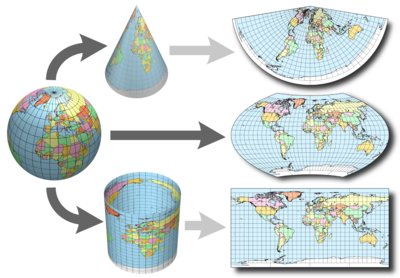

Image source: U.S. Geological Survey. (2011). What are Universal Transverse Mercator (UTM) zones?

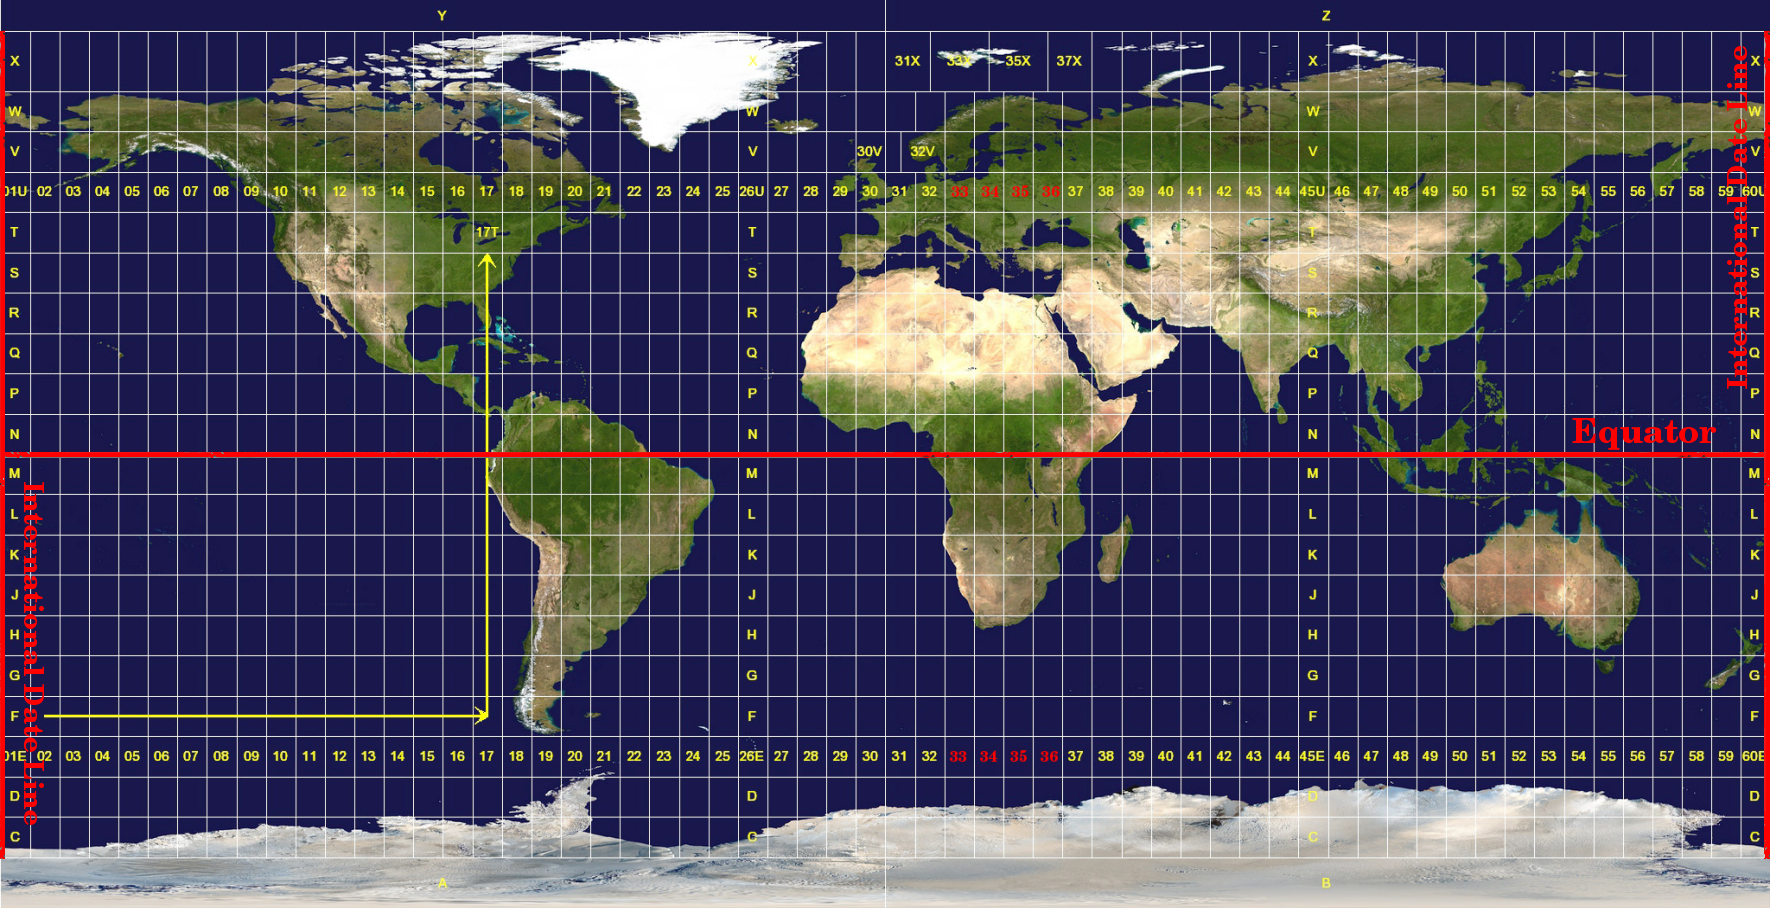

Image source: U.S. Geological Survey. (2011). What are Universal Transverse Mercator (UTM) zones?

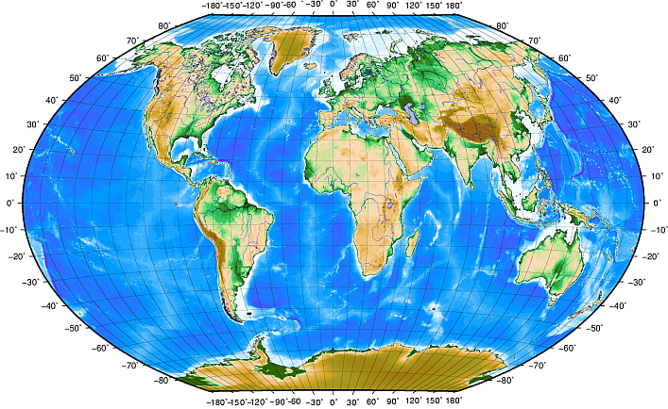

Image source: Snyder, J. P. (1987). Map projections: A working manual (USGS Professional Paper 1395). U.S. Geological Survey.

In [ ]:
print("\nCoordinate Reference System (CRS):")
print(admin_boundaries.crs)  # Display the CRS for Admin boundaries


Coordinate Reference System (CRS):
EPSG:3857


In [ ]:
# Load the shapefile (default projection)
gdf = gpd.read_file(r'Urban Data Science/Day 1/Data/Admin_boundary/Austria_Admin_Boundary.shp')

# Check current projection
print("Current CRS:", gdf.crs)

Current CRS: EPSG:3857


In [ ]:
# Set CRS if missing
# Let's assume it’s WGS 84 (EPSG:4326) if no projection is defined
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)
    print("CRS set to EPSG:4326")

# Reproject to a local Austrian projection
# Example: EPSG:31287 – MGI / Austria Lambert
gdf_proj = gdf.to_crs(epsg=31287)

# Save the projected version
#gdf_proj.to_file(r'Urban Data Science/Day 1/Data/Admin_boundary/Austria_Admin_Boundary_projected.shp')
# Use GeoJSON, which can store large numbers and complex geometries safely: GeoJSON
gdf.to_file(r'Urban Data Science/Day 1/Data/Admin_boundary/reprojected.geojson', driver="GeoJSON")
print("Reprojection complete to EPSG:31287")

Reprojection complete to EPSG:31287


In [ ]:
print("\nCoordinate Reference System (CRS):")
print(gdf_proj.crs)  # Display the CRS


Coordinate Reference System (CRS):
EPSG:31287


In [ ]:
# Reproject to WGS84 if not already
if admin_boundaries.crs.to_epsg() != 4326:
    admin_boundaries = admin_boundaries.to_crs(epsg=4326)